<a href="https://colab.research.google.com/github/jassi-jassi/Customer-Behavior-Analysis-Based-on-Transaction-Data/blob/main/Customer_Behavior_Analysis_Based_on_Transaction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Loading the data from CSV
file_path = '/content/Hackathon_Working_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP                     SGRP                    SSGRP  \
0     BUTTER MARGR  (4/94)                   BUTTER                   SALTED   
1  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                CHOCOLATE         CHOCOLATE PANNED         CHOCOLATE PANNED   
3             PACKAGED TEA               MAIN PACKS               MAIN PACKS   
4         ALL IODISED SALT            POWDERED SALT            POWDERED SALT   

                      CMP           MBRD                 BRD  
0               G C M M F           AMUL                AMUL  
1             

In [4]:
# Convert the MONTH column to numerical values
data['MONTH'] = data['MONTH'].apply(lambda x: int(x[1:]))

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values or handle appropriately
data = data.dropna()

# Remove duplicate rows
data = data.drop_duplicates()

# Convert other necessary columns to appropriate data types
data['DAY'] = data['DAY'].astype(int)
data['BILL_AMT'] = data['BILL_AMT'].astype(float)
data['QTY'] = data['QTY'].astype(int)
data['VALUE'] = data['VALUE'].astype(float)
data['PRICE'] = data['PRICE'].astype(float)

# Display cleaned data info
print(data.info())


MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 26895 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26895 non-null  int64  
 1   STORECODE  26895 non-null  object 
 2   DAY        26895 non-null  int64  
 3   BILL_ID    26895 non-null  object 
 4   BILL_AMT   26895 non-null  float64
 5   QTY        26895 non-null  int64  
 6   VALUE      26895 non-null  float64
 7   PRICE      26895 non-null  float64
 8   GRP        26895 non-null  object 
 9   SGRP       26895 non-null  object 
 10  SSGRP      26895 non-null  object 
 11  CMP        26895 non-null  object 
 12  MBRD       26895 non-null  object 
 13  BRD        26895 non-null  object 
dtypes: float64(3), int64(3), obj

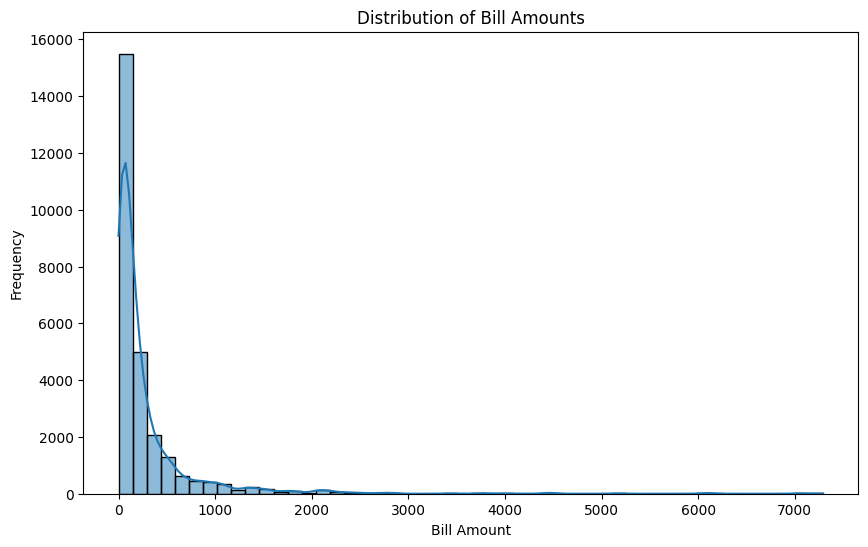

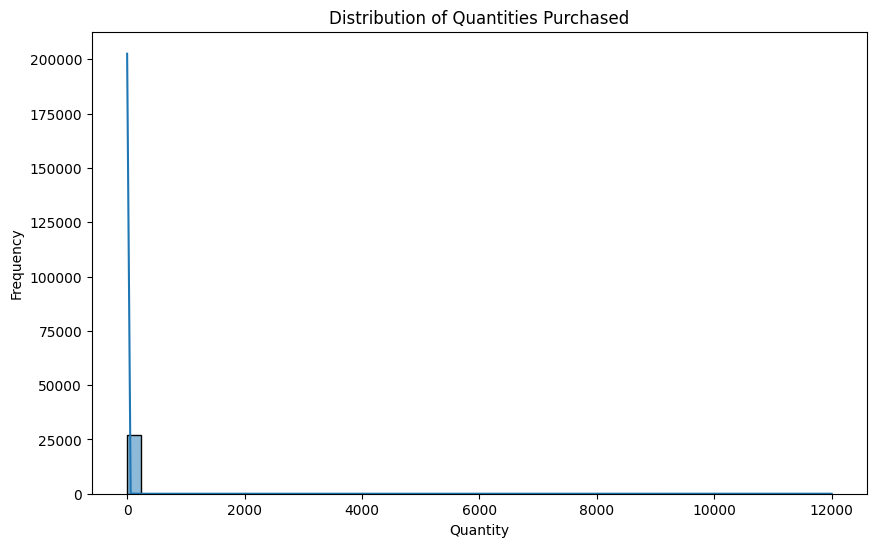

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of bill amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['BILL_AMT'], bins=50, kde=True)
plt.title('Distribution of Bill Amounts')
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of quantities purchased
plt.figure(figsize=(10, 6))
sns.histplot(data['QTY'], bins=50, kde=True)
plt.title('Distribution of Quantities Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


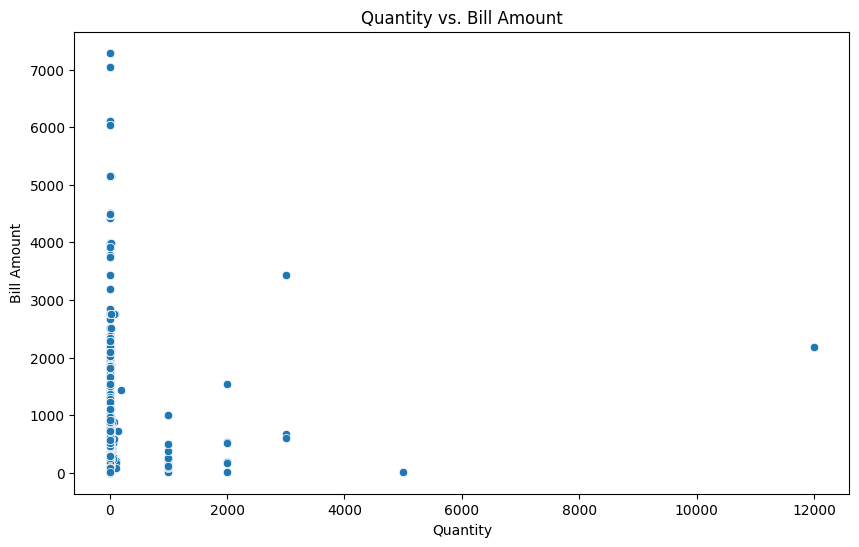

In [6]:
# Correlation between bill amount and quantity purchased
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QTY', y='BILL_AMT', data=data)
plt.title('Quantity vs. Bill Amount')
plt.xlabel('Quantity')
plt.ylabel('Bill Amount')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


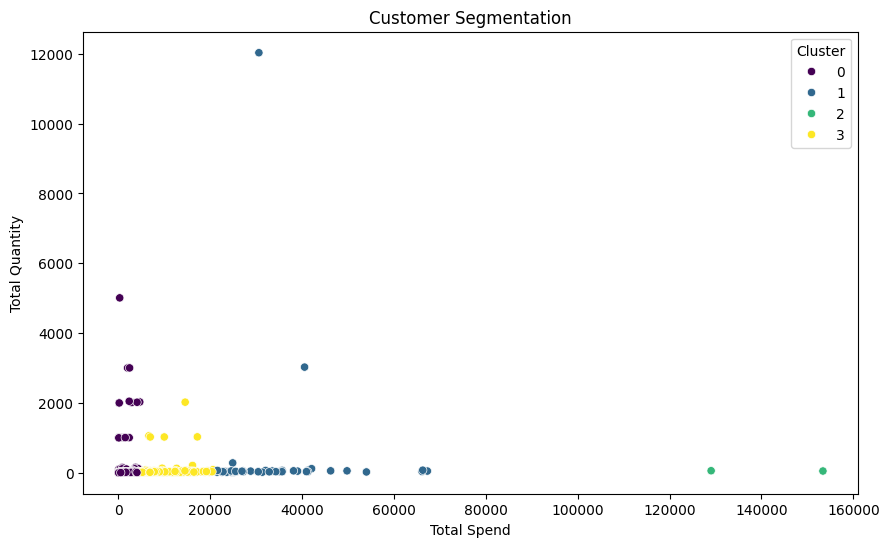

In [7]:
from sklearn.cluster import KMeans

# Prepare data for clustering
customer_data = data.groupby('BILL_ID').agg({
    'BILL_AMT': 'sum',
    'QTY': 'sum'
}).reset_index()

# Rename columns for clarity
customer_data.columns = ['BILL_ID', 'TotalSpend', 'TotalQuantity']

# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalSpend', 'TotalQuantity']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSpend', y='TotalQuantity', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Total Quantity')
plt.legend(title='Cluster')
plt.show()


In [8]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare data for market basket analysis
basket = data.groupby(['BILL_ID', 'GRP'])['QTY'].sum().unstack().reset_index().fillna(0).set_index('BILL_ID')

# Convert data to binary
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
print(rules.sort_values(by='lift', ascending=False).head(10))


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                           antecedents  \
881  (BISCUITS - CORE & NON CORE, WASHING POWDERS/L...   
880         (TOILET SOAPS (04/00), CLEANERS - UTENSIL)   
866                 (CLEANERS - UTENSIL, PACKAGED TEA)   
867  (BISCUITS - CORE & NON CORE, WASHING POWDERS/L...   
749                               (CLEANERS - UTENSIL)   
748            (WASHING POWDERS/LIQUIDS, TOOTH PASTES)   
758    (TOILET SOAPS (04/00), WASHING POWDERS/LIQUIDS)   
763                             (DETERGENT CAKES/BARS)   
907  (REFINED EDIBLE OILS-ALL PACKS, BISCUITS - COR...   
910          (SPICES (03/04), WASHING POWDERS/LIQUIDS)   

                                           consequents  antecedent support  \
881         (TOILET SOAPS (04/00), CLEANERS - UTENSIL)            0.079234   
880  (BISCUITS - CORE & NON CORE, WASHING POWDERS/L...            0.025685   
866  (BISCUITS - CORE & NON CORE, WASHING POWDERS/L...            0.025685   
867                 (CLEANERS - UTENSIL, PACKAGED